# I- Data Pre-processing
Exploration and cleaning of the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
Quora_data = pd.read_csv("train.csv")

In [3]:
Quora_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [4]:
Quora_data.isnull().sum()

qid              0
question_text    0
target           0
dtype: int64

In [5]:
Quora_data.head(4)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000975C4A8>]],
      dtype=object)

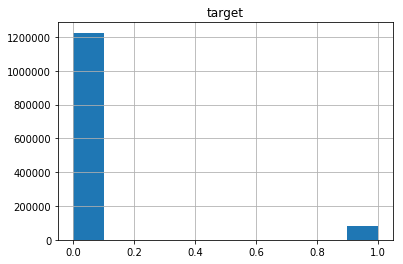

In [6]:
Quora_data.hist(bins=10)

In [7]:
Quora_data["target"].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

## I-1 Data Sample and Creating a banlanced sample

In [8]:
sincireData = Quora_data[Quora_data.target==0].sample(n=Quora_data[Quora_data.target==1].shape[0],random_state=42)
sincireData.shape

(80810, 3)

In [9]:
balancedData = [sincireData,Quora_data[Quora_data.target==1]]
balancedData = pd.concat(balancedData)

balancedData.shape[0]

161620

In [10]:
balancedData = balancedData.sample(n=balancedData.shape[0])
Data = balancedData.sample(frac=0.05,random_state=10)
Data

,qid,question_text,target
759241,94c163af4d1bf133374e,Why did Yahweh rape Marry? Since Mary was a te...,1
1157375,e2c6a88a8f796551e93c,Why don't the faithful rewrite the Bible to ge...,1
489426,5fdb244a4eeb5c404b31,Why are the US and Israeli Jews so close to be...,1
784024,9998089c17eb008aa44e,Did ESPN alienate millions of viewers by mixin...,1
857157,a7f0e60f3959345ab15e,How can liberals know that their grandchildren...,1
1254216,f5c94da3cc95df391e03,How can we satisfy crying SJWs?,1
534698,68b7440c20bc08a7a9fd,How do people shoot themselves while cleaning ...,0
1106979,d8ee124916015929372f,What should I keep in mind moving from San Jua...,0
1010243,c5f56e0968ac5ae6f9fd,"What evidence (shown to us, not hearsay) sugge...",1
855440,a79b310d9ae0f9be5b34,How can I trust again after being lied to and ...,0


In [11]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(Data,test_size=0.2,random_state=21)

## I-2 Tokonizing and Cleanning the data

In [12]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [13]:
import nltk
import spacy
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import string


In [14]:
# Loading the English Tokenizer
en_nlp = spacy.load("en_core_web_sm")
# Parser load the Parser
parser = English()
#list of Stop word
stop_word = spacy.lang.en.stop_words.STOP_WORDS
#List of Ponctuation marks
punctuations = string.punctuation

def spacy_tokenizer(question):
    tokens = parser(question)
    
    #lemmanizing each token and converting to lowercase
    tokens = [word.lemma_.lower().strip() if(word.lemma_!="-PRON-") else word.lower_ for word in tokens]
    #for word in tonkens:
    #    if(word.lemma_ != "-PRON-"):
    #        lemmawords.append(word.lemma_.lower().strip())
    #    else:
    #        lemmawords.append(word.lower_)
    #tokens = lemmawords
    
    #removing StopWord and Punctuation with a filter (on-line-code)
    tokens =[word for word in tokens if word not in stop_word and word not in punctuations  ]
    
    #list of token
    return tokens

In [15]:


LemmaVetor = CountVectorizer(tokenizer=spacy_tokenizer)
LemmaVetor.fit(train["question_text"])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function spacy_tokenizer at 0x000000001D66A378>,
        vocabulary=None)

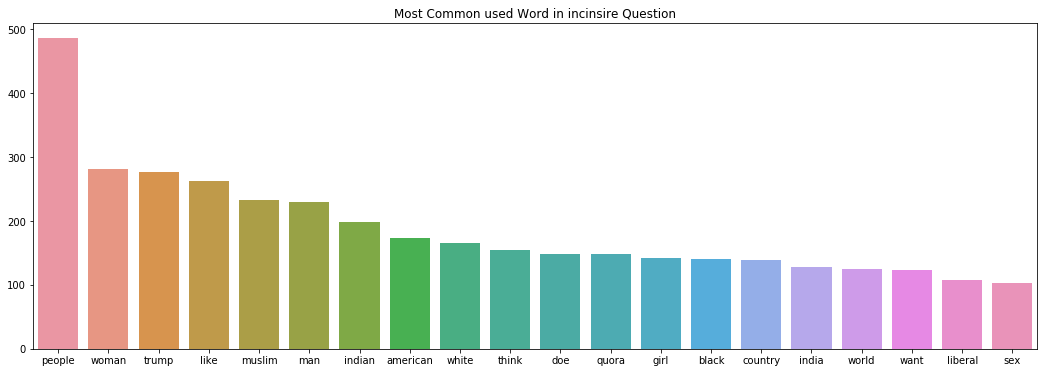

In [21]:
IncesireQuest = [quest for quest in train[train.target==1]["question_text"] ]
IncesireQuest = spacy_tokenizer(" ".join(IncesireQuest))

incensire_counter = Counter(IncesireQuest)

incesire_Word = [word[0] for word in incensire_counter.most_common(20)]
incesire_number = [word[1] for word in incensire_counter.most_common(20)]


fig = plt.figure(figsize=(18,6))
snb.barplot(x=incesire_Word,y=incesire_number)
plt.title("Most Common used Word in incinsire Question")
plt.show()